                                        - Análise exploratória e organizaçao de dados mensalmente.

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 

caminho = ('data_clean.csv') #variavel de caminho do dataset

dataset = pd.read_csv(caminho, sep=';') #lendo o csv

dataset['data'] = pd.to_datetime(dataset['data'], format='%Y-%m-%d') #transformando a coluna data para o formato date, pois estava me retornando erros

dataset['total_de_vendas'] = dataset['quantidade'] * dataset['preço'] #adicionando uma nova coluna para totais de vendas

vendas_mes = dataset.groupby(dataset['data'].dt.to_period('M')).sum(numeric_only=True)['total_de_vendas'] #agrupando os dados por mes e somando o total de vends

vendas_mes.index = vendas_mes.index.to_timestamp() #indexando a data pelo inicio do mes, pois ajudou no dataviz

print(vendas_mes)


data
2023-01-01    191316.68
2023-02-01    205117.25
2023-03-01    175301.79
2023-04-01    254835.43
2023-05-01     22948.15
2023-06-01    273833.89
2023-07-01    224241.44
2023-08-01     95752.93
2023-09-01    223816.59
2023-10-01    246528.94
2023-11-01    342767.08
2023-12-01    203268.68
Freq: MS, Name: total_de_vendas, dtype: float64


                                Grafico de linhas mostrando a tendencia de vendas ao longo de 12 meses.

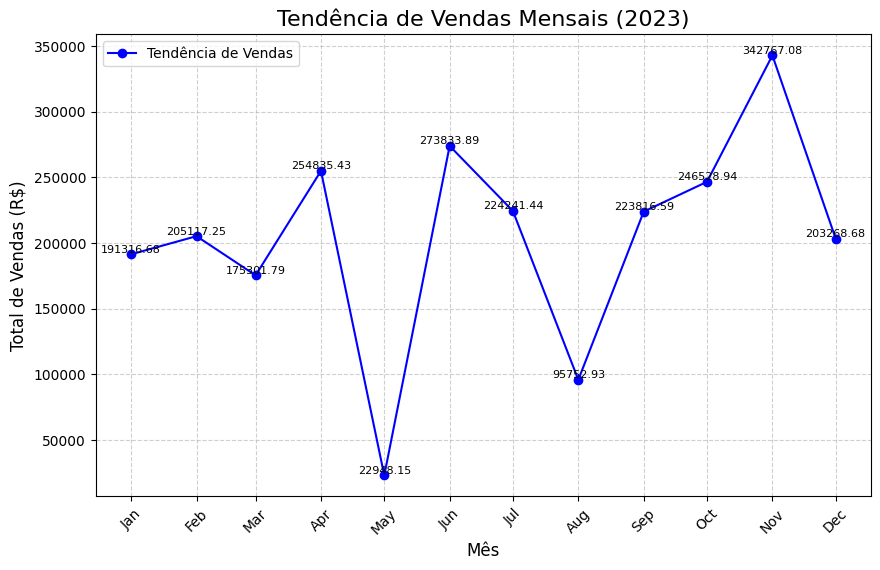

In [27]:
plt.figure(figsize=(10, 6)) # Configurando o tamanho do plot 


plt.plot(vendas_mes.index, vendas_mes.values, marker='o', linestyle='-', color='blue', label='Tendência de Vendas') # criando o plot

# Adicionando detalhes de valores sobre os pontos mensais
for x, y in zip(vendas_mes.index, vendas_mes.values):
    plt.text(x, y, f"{y:.2f}", fontsize=8, ha='center', va='bottom')  # Alinha o texto acima do ponto


plt.title("Tendência de Vendas Mensais (2023)", fontsize=16)
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Total de Vendas (R$)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Ajustando rotulos do eixo X para exibir os nomes dos meses
plt.xticks(vendas_mes.index, vendas_mes.index.strftime('%b'), rotation=45)

plt.show()


Mes de maio foi o de mais baixas nas vendas e o de novembro o mes com mais altas nas vendas.